In [205]:
import os
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt

import PIL
from PIL import Image
from io import BytesIO

import numpy as np
import torch
from torchvision import transforms

import os
import numpy as np
from pathlib import Path

import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch import nn
import torch.nn.functional as F

In [6]:
def load_html_sample(url):
    original_photo=requests.get(url)
    with Image.open(BytesIO(original_photo.content)) as img:
        data_img=np.array(img)
    return data_img

def img_cut(data):
    
    top_left_vertical = 60
    top_left_horizontal = 100
    height = 480
    width = 575

    processed = data[top_left_vertical:top_left_vertical+height, top_left_horizontal:top_left_horizontal+width]
    
    return processed

def gray_url(url):
    img=img_cut(load_html_sample(url))
    img = 0.2989 * img[:,:,0] + 0.5870 * img[:,:,1] + 0.1140 * img[:,:,2]
    return img

def gray_scale(img):
    r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [7]:
def concat_csv_in_folder(folder_path):
    csv_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]
    df_concatenated = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)
    return df_concatenated

## directory
data = concat_csv_in_folder("/Users/jianggh/Desktop/Gravity Spy Project/Gravity Spy Dataset/Data")

data = data[['ml_label','ml_confidence','url1','url2','url3','url4']]


#Change ml_label column into one hot expression.
unique_values = data['ml_label'].unique()

data.dropna()

data['ml_confidence'] = data['ml_confidence'].astype(float)

In [8]:
x = 0
while 1:
    x += 1
    if data.loc[x,'ml_label'] == 'Light_Modulation':
        break

u1 = data.loc[x,'url1']
u2 = data.loc[x,'url2']
u3 = data.loc[x,'url3']
u4 = data.loc[x,'url4']

u1 = Image.fromarray(img_cut(load_html_sample(u1)))
u2 = Image.fromarray(img_cut(load_html_sample(u2)))
u3 = Image.fromarray(img_cut(load_html_sample(u3)))
u4 = Image.fromarray(img_cut(load_html_sample(u4)))

u2.show()

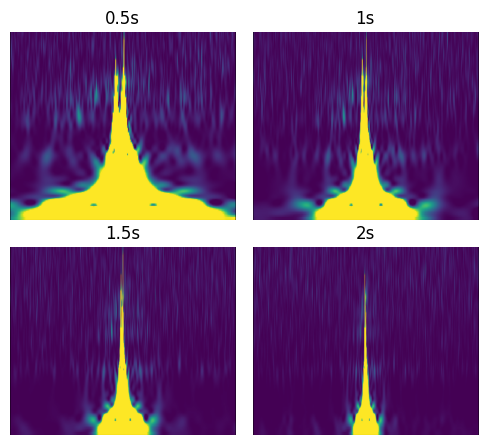

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(5, 4.5))

# 展平axes数组以便于索引
axes = axes.ravel()

# 图片和标题列表
images = [u1, u2, u3, u4]
titles = ['0.5s', '1s', '1.5s', '2s']

# 循环绘制每张图片
for i, (img, title) in enumerate(zip(images, titles)):
    axes[i].imshow(img, cmap='gray')  # 使用灰度色图显示
    axes[i].set_title(title)
    axes[i].axis('off')  # 关闭坐标轴

plt.tight_layout()  # 自动调整子图参数
plt.savefig('/Users/jianggh/Desktop/augmentations/output_figure.png', dpi=1080, bbox_inches='tight')  # 保存为PNG格式，分辨率300dpi
plt.show()

In [18]:
u1 = transforms.Resize((448, 448), interpolation=Image.NEAREST)(u1)

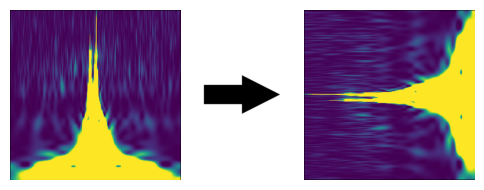

In [21]:
import matplotlib.image as mpimg
arrow = mpimg.imread('/Users/jianggh/Desktop/augmentations/arrow.jpg')

fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 0.5, 1]}, figsize=(5, 2))

from torchvision.transforms import functional as F
aug = F.rotate(u1, angle=90)

ax[0].imshow(u1, cmap='gray')
ax[0].axis('off')  

ax[1].imshow(arrow, cmap='gray')
ax[1].axis('off')

ax[2].imshow(aug, cmap='gray')
ax[2].axis('off')  

plt.tight_layout()
plt.savefig('/Users/jianggh/Desktop/augmentations/rotation.jpg', dpi=1080, bbox_inches='tight')  # 保存为PNG格式，分辨率300dpi
plt.show()

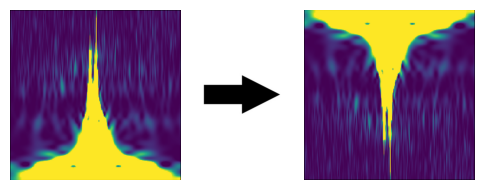

In [23]:
fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 0.5, 1]}, figsize=(5, 2))

aug = F.vflip(u1)

ax[0].imshow(u1, cmap='gray')
ax[0].axis('off')  

ax[1].imshow(arrow, cmap='gray')
ax[1].axis('off')

ax[2].imshow(aug, cmap='gray')
ax[2].axis('off')  

plt.tight_layout()
plt.savefig('/Users/jianggh/Desktop/augmentations/vflip.jpg', dpi=1080, bbox_inches='tight')  # 保存为PNG格式，分辨率300dpi
plt.show()

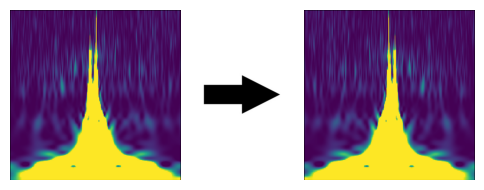

In [24]:
fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 0.5, 1]}, figsize=(5, 2))

aug = F.hflip(u1)

ax[0].imshow(u1, cmap='gray')
ax[0].axis('off')  

ax[1].imshow(arrow, cmap='gray')
ax[1].axis('off')

ax[2].imshow(aug, cmap='gray')
ax[2].axis('off')  

plt.tight_layout()
plt.savefig('/Users/jianggh/Desktop/augmentations/hflip.jpg', dpi=1080, bbox_inches='tight')  # 保存为PNG格式，分辨率300dpi
plt.show()

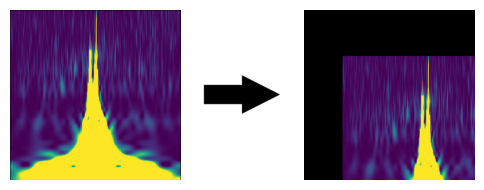

In [47]:
fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 0.5, 1]}, figsize=(5, 2))

aug = F.affine(u1, angle=0, translate=(100, 120), scale=1.0, shear=0, fill=(0,0,0,255))

ax[0].imshow(u1, cmap='gray')
ax[0].axis('off')  

ax[1].imshow(arrow, cmap='gray')
ax[1].axis('off')

ax[2].imshow(aug, cmap='gray')
ax[2].axis('off')  

plt.tight_layout()
plt.savefig('/Users/jianggh/Desktop/augmentations/translation.jpg', dpi=1080, bbox_inches='tight')
plt.show()

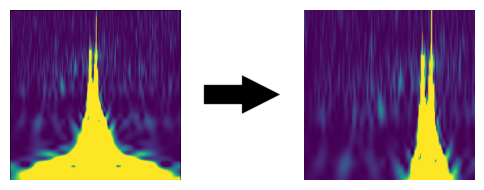

In [53]:
fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 0.5, 1]}, figsize=(5, 2))

aug = transforms.RandomCrop((300,300))(u1)
aug = transforms.Resize((448, 448), interpolation=Image.BILINEAR)(aug)

ax[0].imshow(u1, cmap='gray')
ax[0].axis('off')  

ax[1].imshow(arrow, cmap='gray')
ax[1].axis('off')

ax[2].imshow(aug, cmap='gray')
ax[2].axis('off')  

plt.tight_layout()
plt.savefig('/Users/jianggh/Desktop/augmentations/RandomCrop.jpg', dpi=1080, bbox_inches='tight')
plt.show()

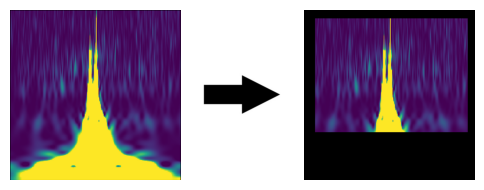

In [56]:
import random

class RandomWindow:
    def __init__(self, window_size, p=0.5):
        if isinstance(window_size, int):
            self.window_size = (window_size, window_size)
        elif isinstance(window_size, tuple) and len(window_size) == 2:
            self.window_size = window_size
        else:
            raise ValueError("window_size should be an int or a tuple of length 2.")
        self.p = p

    def __call__(self, img):
        if random.random() > self.p:
            return img

        if isinstance(img, torch.Tensor):
            img = F.to_pil_image(img)

        width, height = img.size
        window_h, window_w = self.window_size

        window_h = min(window_h, height)
        window_w = min(window_w, width)

        x = random.randint(0, width - window_w)
        y = random.randint(0, height - window_h)

        black_img = Image.new('RGB', (width, height), (0, 0, 0)) # 假设是 RGB 图像，如果是灰度图用 'L' 和 0

        box = (x, y, x + window_w, y + window_h)
        window_region = img.crop(box)
        black_img.paste(window_region, box)

        if isinstance(img, torch.Tensor):
            black_img = F.to_tensor(black_img)

        return black_img

fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 0.5, 1]}, figsize=(5, 2))

aug = RandomWindow(window_size=(300,400),p=1)(u1)

ax[0].imshow(u1, cmap='gray')
ax[0].axis('off')  

ax[1].imshow(arrow, cmap='gray')
ax[1].axis('off')

ax[2].imshow(aug, cmap='gray')
ax[2].axis('off')  

plt.tight_layout()
plt.savefig('/Users/jianggh/Desktop/augmentations/Window.jpg', dpi=1080, bbox_inches='tight')
plt.show()

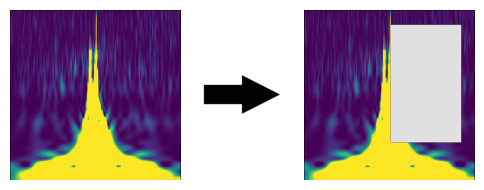

In [69]:
fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 0.5, 1]}, figsize=(5, 2))

aug = transforms.ToTensor()(u1)
aug = transforms.RandomErasing(p=1, scale=(0.1, 0.6), ratio=(0.3, 3.3),value=(0,0,0,225))(aug)
aug = transforms.ToPILImage()(aug)

ax[0].imshow(u1, cmap='gray')
ax[0].axis('off')  

ax[1].imshow(arrow, cmap='gray')
ax[1].axis('off')

ax[2].imshow(aug, cmap='gray')
ax[2].axis('off')  

plt.tight_layout()
plt.savefig('/Users/jianggh/Desktop/augmentations/RandomErasing.jpg', dpi=1080, bbox_inches='tight')
plt.show()

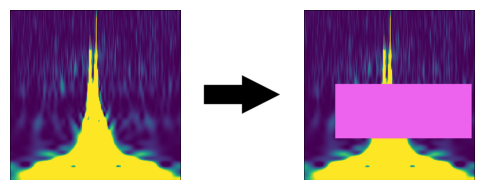

In [195]:
fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 0.5, 1]}, figsize=(5, 2))

aug = transforms.ToTensor()(u1)
aug = transforms.RandomErasing(p=1, scale=(0.1, 0.6), ratio=(0.3, 3.3),value=(30,255,30,100))(aug)
aug = transforms.ToPILImage()(aug)

ax[0].imshow(u1, cmap='gray')
ax[0].axis('off')  

ax[1].imshow(arrow, cmap='gray')
ax[1].axis('off')

ax[2].imshow(aug, cmap='gray')
ax[2].axis('off')  

plt.tight_layout()
plt.savefig('/Users/jianggh/Desktop/augmentations/RandomErasing-Color.jpg', dpi=1080, bbox_inches='tight')
plt.show()

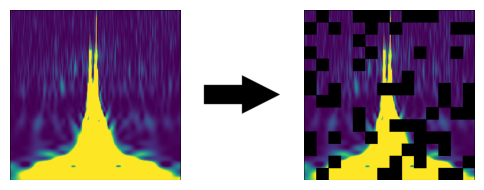

In [196]:
from PIL import Image, ImageDraw

class HideAndSeek:
    def __init__(self, square_size, num_squares):
        self.square_size = square_size
        self.num_squares = num_squares

    def __call__(self, img):
        img = img.copy()
        w, h = img.size
        squares = [(i, j) for i in range(0, w, self.square_size) for j in range(0, h, self.square_size)]
        selected_squares = random.sample(squares, self.num_squares)

        for (x, y) in selected_squares:
            draw = ImageDraw.Draw(img)
            draw.rectangle([x, y, x + self.square_size, y + self.square_size], fill=(0, 0, 0))

        return img

fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 0.5, 1]}, figsize=(5, 2))

aug = HideAndSeek(square_size=32, num_squares=60)(u1)

ax[0].imshow(u1, cmap='gray')
ax[0].axis('off')  

ax[1].imshow(arrow, cmap='gray')
ax[1].axis('off')

ax[2].imshow(aug, cmap='gray')
ax[2].axis('off')  

plt.tight_layout()
plt.savefig('/Users/jianggh/Desktop/augmentations/Hide-and-Seek.jpg', dpi=1080, bbox_inches='tight')
plt.show()

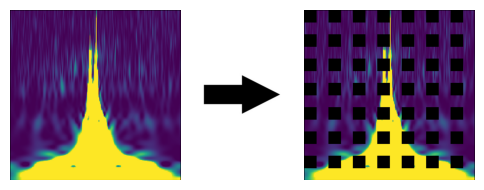

In [129]:
class GridMask:
    def __init__(self, grid_size, mask_ratio):
        self.grid_size = grid_size
        self.mask_ratio = mask_ratio

    def __call__(self, img):
        img = img.copy()
        w, h = img.size
        draw = ImageDraw.Draw(img)
        
        # Calculate the number of grid cells in each dimension
        grid_w = w // self.grid_size
        grid_h = h // self.grid_size
        
        # Iterate over each grid cell
        for i in range(grid_w):
            for j in range(grid_h):
                # Determine if this grid cell should be masked
                if i % 2 == 0 and j % 2 == 0:
                    # Calculate the coordinates of the grid cell
                    x1 = i * self.grid_size
                    y1 = j * self.grid_size
                    x2 = x1 + self.grid_size
                    y2 = y1 + self.grid_size
                    
                    # Draw the mask
                    draw.rectangle([x1, y1, x2, y2], fill=(0, 0, 0))
        
        return img

fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 0.5, 1]}, figsize=(5, 2))

aug = GridMask(grid_size=32, mask_ratio=0.5)(u1)

ax[0].imshow(u1, cmap='gray')
ax[0].axis('off')  

ax[1].imshow(arrow, cmap='gray')
ax[1].axis('off')

ax[2].imshow(aug, cmap='gray')
ax[2].axis('off')  

plt.tight_layout()
plt.savefig('/Users/jianggh/Desktop/augmentations/GridMask.jpg', dpi=1080, bbox_inches='tight')
plt.show()

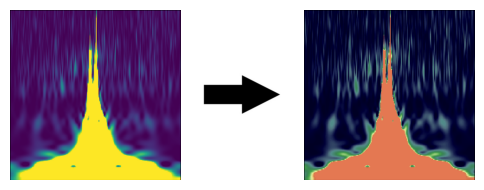

In [172]:
fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 0.5, 1]}, figsize=(5, 2))

aug = color_jitter = transforms.ColorJitter(
    brightness=1,
    contrast=1,
    saturation=1,
    hue=0.2
)(u1)

ax[0].imshow(u1, cmap='gray')
ax[0].axis('off')  

ax[1].imshow(arrow, cmap='gray')
ax[1].axis('off')

ax[2].imshow(aug, cmap='gray')
ax[2].axis('off')  

plt.tight_layout()
plt.savefig('/Users/jianggh/Desktop/augmentations/Color Jittering.jpg', dpi=1080, bbox_inches='tight')
plt.show()

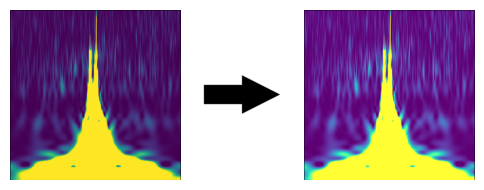

In [174]:
class RandomAmplitudeScaling:
    def __init__(self):
        super().__init__()

    def __call__(self, img):
        scale_factor = random.uniform(0.1, 2)

        if isinstance(img, Image.Image):
            img = transforms.ToTensor()(img)

        scaled_img = img * scale_factor

        scaled_img = torch.clamp(scaled_img, 0, 1)

        scaled_img = F.to_pil_image(scaled_img)

        return scaled_img

fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 0.5, 1]}, figsize=(5, 2))

aug = RandomAmplitudeScaling()(u1)

ax[0].imshow(u1, cmap='gray')
ax[0].axis('off')  

ax[1].imshow(arrow, cmap='gray')
ax[1].axis('off')

ax[2].imshow(aug, cmap='gray')
ax[2].axis('off')  

plt.tight_layout()
plt.savefig('/Users/jianggh/Desktop/augmentations/RandomAmplitudeScaling.jpg', dpi=1080, bbox_inches='tight')
plt.show()

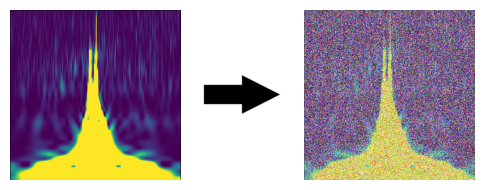

In [190]:
def add_gaussian_noise(img, mean=0, std=0.5):
    
    img_tensor = transforms.ToTensor()(img)

    noise = torch.randn(img_tensor.size()) * std + mean

    noisy_img_tensor = img_tensor + noise

    noisy_img_tensor = torch.clamp(noisy_img_tensor, 0, 1)

    noisy_img = transforms.ToPILImage()(noisy_img_tensor)
    
    return noisy_img


fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 0.5, 1]}, figsize=(5, 2))

aug = add_gaussian_noise(u1)

ax[0].imshow(u1, cmap='gray')
ax[0].axis('off')  

ax[1].imshow(arrow, cmap='gray')
ax[1].axis('off')

ax[2].imshow(aug, cmap='gray')
ax[2].axis('off')  

plt.tight_layout()
plt.savefig('/Users/jianggh/Desktop/augmentations/Gaussain Noise.jpg', dpi=1080, bbox_inches='tight')
plt.show()

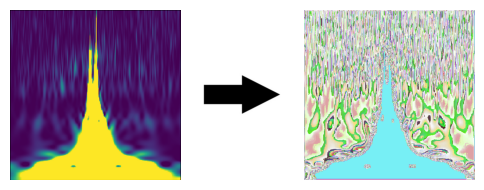

In [236]:
class RandomConvolution(nn.Module):
    def __init__(self, size=3):
        super(RandomConvolution, self).__init__()
        self.size = size
        self.conv = nn.Conv2d(4, 4, kernel_size=size, padding=size//2)
        self._init_weights()

    def _init_weights(self):
        self.conv.weight.data = torch.randn_like(self.conv.weight.data)
        self.conv.bias.data.zero_()

    def forward(self, x):
        return self.conv(x)

def apply_random_convolution(pil_image, size=3):
    transform = transforms.Compose([
        transforms.ToTensor(),
    ])
    inverse_transform = transforms.ToPILImage()
    
    tensor_image = transform(pil_image).unsqueeze(0) 
    
    random_conv = RandomConvolution(size=size)
    
    with torch.no_grad():
        output_tensor = random_conv(tensor_image).squeeze(0) 
    
    output_pil = inverse_transform(output_tensor)
    
    return output_pil

fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 0.5, 1]}, figsize=(5, 2))

aug = apply_random_convolution(u1,size=5)

ax[0].imshow(u1, cmap='gray')
ax[0].axis('off')  

ax[1].imshow(arrow, cmap='gray')
ax[1].axis('off')

ax[2].imshow(aug, cmap='gray')
ax[2].axis('off')  

plt.tight_layout()
plt.savefig('/Users/jianggh/Desktop/augmentations/Random Convolution.jpg', dpi=1080, bbox_inches='tight')
plt.show()

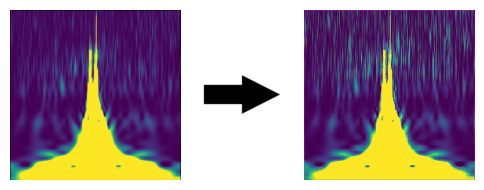

In [303]:
kernel = np.array([[-1, -1, -1],
                    [-1,  9, -1],
                    [-1, -1, -1]])

aug = np.array(u1)
aug = cv2.filter2D(aug, -1, kernel)
aug = Image.fromarray(aug)

fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 0.5, 1]}, figsize=(5, 2))

ax[0].imshow(u1, cmap='gray')
ax[0].axis('off')  
ax[1].imshow(arrow, cmap='gray')
ax[1].axis('off')
ax[2].imshow(aug, cmap='gray')
ax[2].axis('off')  
plt.tight_layout()
plt.savefig('/Users/jianggh/Desktop/augmentations/Sharpen.jpg', dpi=1080, bbox_inches='tight')
plt.show()

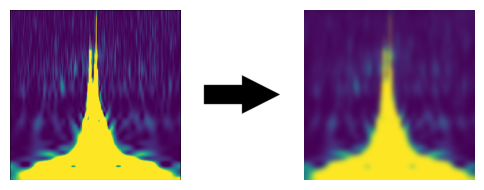

In [290]:
import cv2

aug = np.array(u1)
aug = cv2.GaussianBlur(aug, (39,39), 0)
aug = Image.fromarray(aug)

fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 0.5, 1]}, figsize=(5, 2))

ax[0].imshow(u1, cmap='gray')
ax[0].axis('off')  
ax[1].imshow(arrow, cmap='gray')
ax[1].axis('off')
ax[2].imshow(aug, cmap='gray')
ax[2].axis('off')  
plt.tight_layout()
plt.savefig('/Users/jianggh/Desktop/augmentations/Gaussian Blur.jpg', dpi=1080, bbox_inches='tight')
plt.show()

In [329]:
def generate_gaussian_kernel(size, sigma):
    kernel = torch.zeros(size, size)
    center = size // 2
    if sigma <= 0:
        sigma = ((size - 1) * 0.5 - 1) * 0.3 + 0.8
    s = 2 * (sigma ** 2)
    sum_val = 0
    for i in range(size):
        for j in range(size):
            x = i - center
            y = j - center
            kernel[i, j] = np.exp(-(x ** 2 + y ** 2) / s)
            sum_val += kernel[i, j]
    kernel /= sum_val
    return kernel

def sharpen_image(image, kernel_size=3):

    image = image.convert('RGB')
    print(image.mode)
    transform = transforms.ToTensor()
    image_tensor = transform(image).unsqueeze(0)  # [1, C, H, W]

    kernel = generate_gaussian_kernel(kernel_size, sigma=1)
    print(kernel)
    kernel = kernel.repeat(3, 3, 1, 1)

    sharpened_tensor = F.conv2d(
        image_tensor, 
        kernel, 
        padding=kernel_size // 2,
        groups = 1
    )
    print(sharpened_tensor.shape)

    sharpened_tensor = torch.clamp(sharpened_tensor, 0, 1)

    sharpened_image = transforms.ToPILImage()(sharpened_tensor.squeeze())

    print(sharpened_image.mode)

    return sharpened_image

sharpen_image(u1).show()

RGB
tensor([[0.0751, 0.1238, 0.0751],
        [0.1238, 0.2042, 0.1238],
        [0.0751, 0.1238, 0.0751]])
torch.Size([1, 3, 448, 448])
RGB


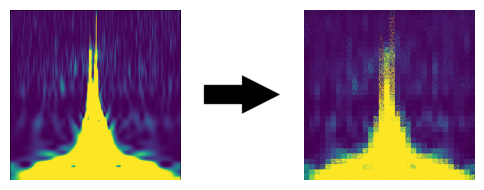

In [348]:
import torch
import torch.nn.functional as F
from PIL import Image
import numpy as np

def patch_shuffle(image: Image.Image, n: int) -> Image.Image:
    """
    对 RGBA 图像进行 Patch Shuffle 处理
    :param image: 输入的 RGBA PIL 图像
    :param n: 网格划分数量 (n x n)
    :return: 处理后的 RGBA PIL 图像
    """
    # 转换为 PyTorch Tensor (C x H x W) 并归一化到 [0, 1]
    img_tensor = torch.tensor(np.array(image)).permute(2, 0, 1).float() / 255.0
    
    # 获取图像尺寸
    c, h, w = img_tensor.shape
    
    # 计算每个 patch 的尺寸
    patch_h = h // n
    patch_w = w // n
    
    # 检查是否可整除
    if h % n != 0 or w % n != 0:
        raise ValueError(f"图像尺寸({h}x{w})必须能被 n={n}整除")
    
    # 划分网格 (n x n x patch_h x patch_w x c)
    patches = img_tensor.unfold(1, patch_h, patch_h).unfold(2, patch_w, patch_w)
    patches = patches.permute(1, 2, 0, 3, 4).contiguous()  # n x n x c x patch_h x patch_w
    
    # 打乱每个 patch 内的像素
    shuffled_patches = []
    for i in range(n):
        row = []
        for j in range(n):
            patch = patches[i, j]  # c x patch_h x patch_w
            # 打乱像素位置
            permuted = patch.reshape(c, -1)  # c x (patch_h * patch_w)
            permuted = permuted[:, torch.randperm(permuted.size(1))]  # 随机排列
            row.append(permuted.view(c, patch_h, patch_w))
        shuffled_patches.append(torch.stack(row))
    
    # 重新组合图像
    shuffled_patches = torch.stack(shuffled_patches)  # n x n x c x patch_h x patch_w
    shuffled_patches = shuffled_patches.permute(2, 0, 3, 1, 4)  # c x n x patch_h x n x patch_w
    result = shuffled_patches.reshape(c, n * patch_h, n * patch_w)
    
    # 转换回 PIL Image (RGBA)
    result_img = (result.permute(1, 2, 0).clip(0, 1).numpy() * 255).astype(np.uint8)
    return Image.fromarray(result_img, 'RGBA')
    

fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 0.5, 1]}, figsize=(5, 2))

aug = patch_shuffle(u1,32)

ax[0].imshow(u1, cmap='gray')
ax[0].axis('off')  
ax[1].imshow(arrow, cmap='gray')
ax[1].axis('off')
ax[2].imshow(aug, cmap='gray')
ax[2].axis('off')  
plt.tight_layout()
plt.savefig('/Users/jianggh/Desktop/augmentations/Patch Shuffle.jpg', dpi=1080, bbox_inches='tight')
plt.show()

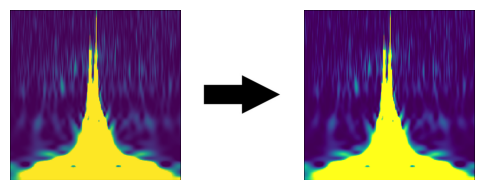

In [358]:
fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 0.5, 1]}, figsize=(5, 2))

aug = transforms.ColorJitter(
    brightness=0,
    contrast=1,
    saturation=0,
    hue=0
)(u1)

ax[0].imshow(u1, cmap='gray')
ax[0].axis('off')  
ax[1].imshow(arrow, cmap='gray')
ax[1].axis('off')
ax[2].imshow(aug, cmap='gray')
ax[2].axis('off')  
plt.tight_layout()
plt.savefig('/Users/jianggh/Desktop/augmentations/Contrast.jpg', dpi=1080, bbox_inches='tight')
plt.show()

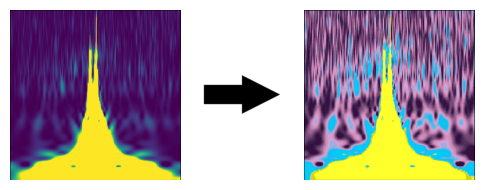

In [360]:
def color_histogram_equalization(image):
    # 确保图像是RGB格式
    image = image.convert('RGB')
    # 将图像转换为numpy数组
    img_array = np.array(image)
    
    # 分离RGB通道
    r, g, b = img_array[:, :, 0], img_array[:, :, 1], img_array[:, :, 2]
    
    # 对每个通道进行直方图均衡化
    def equalize_channel(channel):
        # 计算直方图
        hist, bins = np.histogram(channel.flatten(), 256, [0, 256])
        # 计算累积分布函数
        cdf = hist.cumsum()
        cdf_normalized = cdf * hist.max() / cdf.max()
        # 使用累积分布函数进行均衡化
        cdf_m = np.ma.masked_equal(cdf, 0)
        cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
        cdf = np.ma.filled(cdf_m, 0).astype('uint8')
        return cdf[channel]
    
    r_eq = equalize_channel(r)
    g_eq = equalize_channel(g)
    b_eq = equalize_channel(b)
    
    # 合并均衡化后的通道
    img_eq = np.dstack([r_eq, g_eq, b_eq])
    
    # 转换回PIL图像
    equalized_image = Image.fromarray(img_eq)
    return equalized_image

fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 0.5, 1]}, figsize=(5, 2))

aug = color_histogram_equalization(u1)

ax[0].imshow(u1, cmap='gray')
ax[0].axis('off')  
ax[1].imshow(arrow, cmap='gray')
ax[1].axis('off')
ax[2].imshow(aug, cmap='gray')
ax[2].axis('off')  
plt.tight_layout()
plt.savefig('/Users/jianggh/Desktop/augmentations/Color Hist Equal.jpg', dpi=1080, bbox_inches='tight')
plt.show()

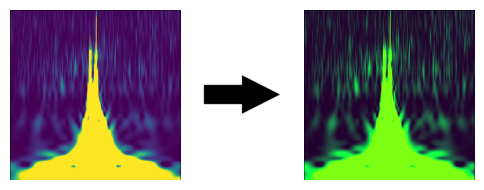

In [402]:
def random_white_balance(image):

    image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    
    avg_b = np.mean(image_cv[:, :, 0])
    avg_g = np.mean(image_cv[:, :, 1])
    avg_r = np.mean(image_cv[:, :, 2])
    
    avg_all = (avg_b + avg_g + avg_r) / 3.0
    
    # 随机调整白平衡
    # 这里我们随机选择一个通道的增益，其他通道的增益会相应调整
    channel_to_adjust = random.choice(['B', 'G', 'R'])
    if channel_to_adjust == 'B':
        gain_b = random.uniform(0.2, 1.8)
        gain_g = avg_all / (avg_g * gain_b)
        gain_r = avg_all / (avg_r * gain_b)
    elif channel_to_adjust == 'G':
        gain_g = random.uniform(0.2, 1.8)
        gain_b = avg_all / (avg_b * gain_g)
        gain_r = avg_all / (avg_r * gain_g)
    else:  # 'R'
        gain_r = random.uniform(0.2, 1.8)
        gain_b = avg_all / (avg_b * gain_r)
        gain_g = avg_all / (avg_g * gain_r)
    
    # 应用增益
    image_cv[:, :, 0] = np.clip(image_cv[:, :, 0] * gain_b, 0, 255)
    image_cv[:, :, 1] = np.clip(image_cv[:, :, 1] * gain_g, 0, 255)
    image_cv[:, :, 2] = np.clip(image_cv[:, :, 2] * gain_r, 0, 255)
    
    # 将处理后的图像转换回RGB格式，并生成新的PIL图像
    image_rgb = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)
    return Image.fromarray(image_rgb)

fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 0.5, 1]}, figsize=(5, 2))

aug = random_white_balance(u1)

ax[0].imshow(u1, cmap='gray')
ax[0].axis('off')  
ax[1].imshow(arrow, cmap='gray')
ax[1].axis('off')
ax[2].imshow(aug, cmap='gray')
ax[2].axis('off')  
plt.tight_layout()
plt.savefig('/Users/jianggh/Desktop/augmentations/Color Hist Equal.jpg', dpi=1080, bbox_inches='tight')
plt.show()